In [1]:
%load_ext autotime
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', None)
# From https://zenodo.org/records/7786276/files/global_shoreline_5deg_1081.geojson?download=1
df = gpd.read_file("global_shoreline_5deg_1081.geojson")
df = df.cx[7.739868:10.167847, 38.745515:41.331451]
df

/home/ubuntu/.local/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 1082 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,OBJECTID,MasterKey,RandomSort,MEAN_SIG_WAVEHEIGHT,TIDAL_RANGE,CHLOROPHYLL,TURBIDITY,TEMP_MOISTURE,EMU_PHYSICAL,REGIONAL_SINUOSITY,GHM,MAX_SLOPE,OUTFLOW_DENSITY,ERODIBILITY,Cluster,LENGTH_GEO,chl_label,river_label,sinuosity_label,slope_label,tidal_label,turbid_label,wave_label,CSU_Descriptor,CSU_ID,OUTFLOW_DENSITY_RESCALED,Shape_Length,id,left,top,right,bottom,geometry
0,907574,907574,1.339858e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.214731,112.695580,9808.007812,Medium,6,778.300676,low chlorophyll,low river discharge,straight,steeply sloping,microtidal,moderately turbid,moderate wave energy,"steeply sloping, straight, medium erodibility,...",62179,0.000012,0.008141,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40867 38.86355, 8.40874 38..."
1,907575,907575,3.967442e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.209415,300.382854,9808.007812,Medium,6,463.994155,low chlorophyll,low river discharge,straight,vertical,microtidal,moderately turbid,moderate wave energy,"vertical, straight, medium erodibility, warm t...",62622,0.000012,0.004439,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40771 38.85997, 8.40761 38..."
2,907586,907586,1.235383e+06,0.622337,0.348026,0.339501,0.057633,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.278436,0.123384,166.613138,12734.571289,Low,3,763.562749,low chlorophyll,moderate river discharge,straight,steeply sloping,minimally tidal,clear,low wave energy,"steeply sloping, straight, low erodibility, wa...",40612,0.000015,0.007537,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.66895 40.13155, 9.66901 40..."
3,907587,907587,6.660882e+05,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.539095,14.684499,31990.990234,High,6,774.841655,low chlorophyll,moderate river discharge,sinuous,sloping,microtidal,turbid,moderate wave energy,"sloping, sinuous, high erodibility, warm tempe...",11645,0.000039,0.007653,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47232 39.10853, 8.47244 39..."
4,907588,907588,1.493575e+04,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.340919,1.932023,31990.990234,High,6,774.900004,low chlorophyll,moderate river discharge,sinuous,flat,microtidal,turbid,moderate wave energy,"flat, sinuous, high erodibility, warm temperat...",11239,0.000039,0.007661,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47553 39.10298, 8.47539 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,915205,915205,2.706507e+06,0.722644,0.344119,0.359111,0.055317,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,7.356478,0.246845,44.026800,63795.773438,Low,3,750.388802,low chlorophyll,moderate river discharge,highly sinuous,sloping,minimally tidal,clear,low wave energy,"sloping, highly sinuous, low erodibility, warm...",35463,0.000077,0.007509,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.34704 41.30481, 9.34715 41..."
2535,915206,915206,1.432397e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,7.584660,22605.697266,Low,3,750.849672,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.007784,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.40441 41.29624, 9.40447 41..."
2536,915207,915207,2.286499e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,4.423934,22605.697266,Low,3,80.127563,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.000848,1082,5.00017,43.666254,10.00017,

In [2]:
df.wave_label.value_counts()

wave_label
low wave energy         1532
moderate wave energy    1007
Name: count, dtype: int64

<Axes: >

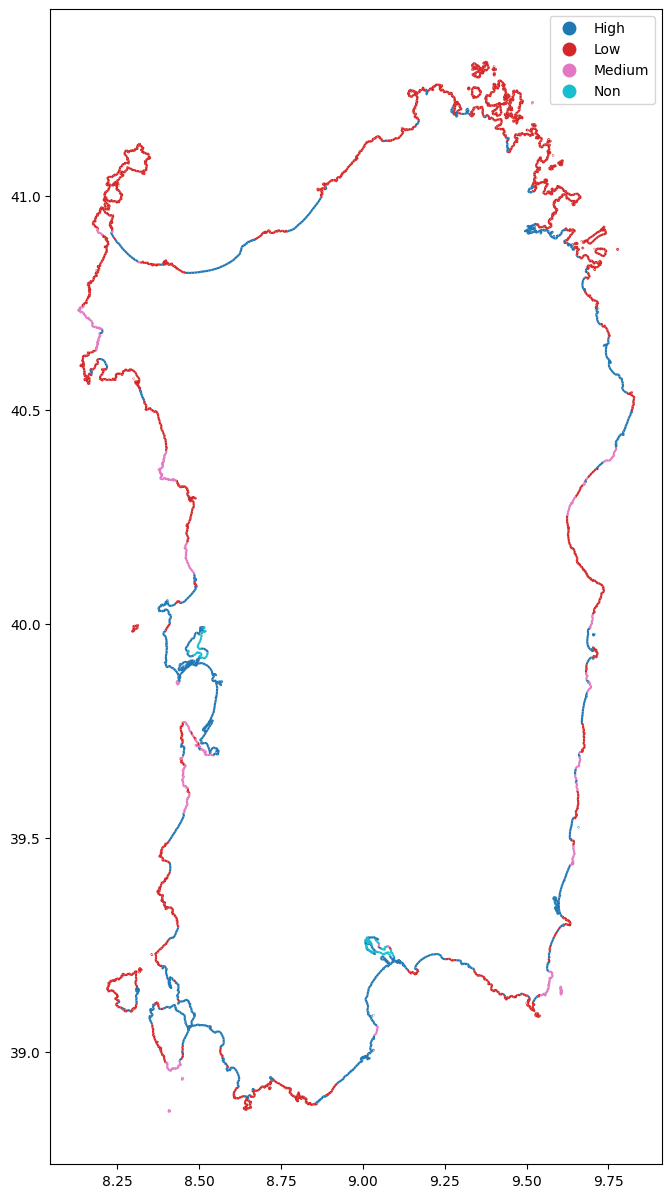

In [3]:
df.plot("ERODIBILITY", legend=True, figsize=(15, 15))

In [4]:
df.geometry.type.value_counts()

MultiLineString    2539
Name: count, dtype: int64

In [5]:
df.LENGTH_GEO.describe()

count    2539.000000
mean      739.979760
std       104.121353
min         5.577506
25%       753.833453
50%       759.606810
75%       772.064432
max       779.064634
Name: LENGTH_GEO, dtype: float64

In [6]:
df.to_crs(3003).length.describe()

count    2539.000000
mean      739.718333
std       104.084327
min         5.575456
25%       753.573519
50%       759.341502
75%       771.795815
max       778.774550
dtype: float64

In [7]:
df

,OBJECTID,MasterKey,RandomSort,MEAN_SIG_WAVEHEIGHT,TIDAL_RANGE,CHLOROPHYLL,TURBIDITY,TEMP_MOISTURE,EMU_PHYSICAL,REGIONAL_SINUOSITY,GHM,MAX_SLOPE,OUTFLOW_DENSITY,ERODIBILITY,Cluster,LENGTH_GEO,chl_label,river_label,sinuosity_label,slope_label,tidal_label,turbid_label,wave_label,CSU_Descriptor,CSU_ID,OUTFLOW_DENSITY_RESCALED,Shape_Length,id,left,top,right,bottom,geometry
0,907574,907574,1.339858e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.214731,112.695580,9808.007812,Medium,6,778.300676,low chlorophyll,low river discharge,straight,steeply sloping,microtidal,moderately turbid,moderate wave energy,"steeply sloping, straight, medium erodibility,...",62179,0.000012,0.008141,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40867 38.86355, 8.40874 38..."
1,907575,907575,3.967442e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.209415,300.382854,9808.007812,Medium,6,463.994155,low chlorophyll,low river discharge,straight,vertical,microtidal,moderately turbid,moderate wave energy,"vertical, straight, medium erodibility, warm t...",62622,0.000012,0.004439,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40771 38.85997, 8.40761 38..."
2,907586,907586,1.235383e+06,0.622337,0.348026,0.339501,0.057633,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.278436,0.123384,166.613138,12734.571289,Low,3,763.562749,low chlorophyll,moderate river discharge,straight,steeply sloping,minimally tidal,clear,low wave energy,"steeply sloping, straight, low erodibility, wa...",40612,0.000015,0.007537,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.66895 40.13155, 9.66901 40..."
3,907587,907587,6.660882e+05,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.539095,14.684499,31990.990234,High,6,774.841655,low chlorophyll,moderate river discharge,sinuous,sloping,microtidal,turbid,moderate wave energy,"sloping, sinuous, high erodibility, warm tempe...",11645,0.000039,0.007653,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47232 39.10853, 8.47244 39..."
4,907588,907588,1.493575e+04,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.340919,1.932023,31990.990234,High,6,774.900004,low chlorophyll,moderate river discharge,sinuous,flat,microtidal,turbid,moderate wave energy,"flat, sinuous, high erodibility, warm temperat...",11239,0.000039,0.007661,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47553 39.10298, 8.47539 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,915205,915205,2.706507e+06,0.722644,0.344119,0.359111,0.055317,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,7.356478,0.246845,44.026800,63795.773438,Low,3,750.388802,low chlorophyll,moderate river discharge,highly sinuous,sloping,minimally tidal,clear,low wave energy,"sloping, highly sinuous, low erodibility, warm...",35463,0.000077,0.007509,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.34704 41.30481, 9.34715 41..."
2535,915206,915206,1.432397e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,7.584660,22605.697266,Low,3,750.849672,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.007784,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.40441 41.29624, 9.40447 41..."
2536,915207,915207,2.286499e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,4.423934,22605.697266,Low,3,80.127563,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.000848,1082,5.00017,43.666254,10.00017,

In [8]:
shorelines = gpd.read_file("shorelines.geojson")
shorelines

,id,area,beach_length,easting,name,northing,Tide range,median_orientation,id_sorted,same_beach,median_slope,ci,n_points,n_points_nonan,geometry
0,aus0001,14472901.48412414,16824.52342226356,526589.1754011525,noname,7259734.061377056,1.451,92.466545,aus0001,None,0.076702,0.0214,654.0,520.0,"LINESTRING (153.26746 -24.70115, 153.26743 -24..."
1,aus0002,53438721.70867591,16794.63203331262,529484.7418874454,noname,7243833.021796449,1.073,64.603602,aus0002,1,0.059681,0.0203,579.0,407.0,"LINESTRING (153.26189 -24.85277, 153.26191 -24..."
2,aus0003,945965.0455573548,1373.06418305453,535380.0262458471,noname,7237842.578773651,1.074,93.116374,aus0003,None,0.041382,0.0112,335.0,243.0,"LINESTRING (153.35089 -24.96818, 153.35075 -24..."
3,aus0004,376936.0048626679,253.8720097247056,535397.4773649719,noname,7236435.680204276,1.074,79.203813,aus0004,None,0.051540,0.0154,319.0,238.0,"LINESTRING (153.35051 -24.98595, 153.35099 -24..."
4,aus0005,1570125.540326883,1830.166677525537,535675.2172291321,noname,7235101.123683789,1.074,74.946714,aus0005,None,0.054151,0.0245,307.0,231.5,"LINESTRING (153.35161 -24.99115, 153.35228 -24..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,nzd0313,22919741.04033367,17378.17283613481,19237414.32246552,noname,-4939929.050573792,NaN,6.636156,nzd0558,None,0.026684,0.0057,324.0,125.0,"LINESTRING (172.73493 -40.50746, 172.73502 -40..."
3144,nzd0314,31243633.43084495,17377.03046703852,19254344.2757707,noname,-4943101.660851713,NaN,15.255119,nzd0559,1,0.023482,0.0029,340.0,128.5,"LINESTRING (172.89029 -40.5122, 172.89037 -40...."
3145,nzd0561,871003.4889067992,925.5347121883722,-5905869.058151758,noname,-5905869.058151758,NaN,144.851964,nzd0560,None,0.073659,0.0210,411.0,271.0,"LINESTRING (168.53027 -46.77665, 168.53027 -46..."
3146,nzd0562,None,None,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,"LINESTRING (174.92149 -36.87885, 174.92069 -36..."
